In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Pick a Dataset 

In this project, I would like to work with Stack Overflow 2018 Survey.

In [13]:
def loadData(fileName):
    """ 
    Load the given dataset file name (CSV)
  
    Parameters: 
    fileName (string): The dataset filename 
  
    Returns: 
    dataframe: The loaded dataset dataframe 
    
    """
    
    df = pd.read_csv(fileName)
    return df 

In [15]:
print("Loading Stackoverflow 2018 Dataset")
df_2018 = loadData("developer_survey_2018/survey_results_public.csv")
print(" Dataset has been loaded")

Loading Stackoverflow 2018 Dataset
 Dataset has been loaded


# 2) Pose at least three questions related to business or real-world applications of how the data could be used

1. What is the average age by country?
2. What is the average IT Experince by country?
3. What is the most popular development language?

# 3) Prepare data

In [16]:
def ExploreDataSet(df):
    """ 
    Print summary stats about the given dataset
  
    Parameters: 
    df (dataframe): Dataset to explore
  
    """
    print("Dataset Number of Rows:", len(df))
    print("Dataset Number of Features:", len(df.columns))
    print("Features: ")
    print(df.columns.values)
    
ExploreDataSet(df_2018)

Dataset Number of Rows: 98855
Dataset Number of Features: 129
Features: 
['Respondent' 'Hobby' 'OpenSource' 'Country' 'Student' 'Employment'
 'FormalEducation' 'UndergradMajor' 'CompanySize' 'DevType' 'YearsCoding'
 'YearsCodingProf' 'JobSatisfaction' 'CareerSatisfaction' 'HopeFiveYears'
 'JobSearchStatus' 'LastNewJob' 'AssessJob1' 'AssessJob2' 'AssessJob3'
 'AssessJob4' 'AssessJob5' 'AssessJob6' 'AssessJob7' 'AssessJob8'
 'AssessJob9' 'AssessJob10' 'AssessBenefits1' 'AssessBenefits2'
 'AssessBenefits3' 'AssessBenefits4' 'AssessBenefits5' 'AssessBenefits6'
 'AssessBenefits7' 'AssessBenefits8' 'AssessBenefits9' 'AssessBenefits10'
 'AssessBenefits11' 'JobContactPriorities1' 'JobContactPriorities2'
 'JobContactPriorities3' 'JobContactPriorities4' 'JobContactPriorities5'
 'JobEmailPriorities1' 'JobEmailPriorities2' 'JobEmailPriorities3'
 'JobEmailPriorities4' 'JobEmailPriorities5' 'JobEmailPriorities6'
 'JobEmailPriorities7' 'UpdateCV' 'Currency' 'Salary' 'SalaryType'
 'ConvertedSalary' 'C

First we will select the subset of the data we need to answer our questions. 

In [20]:
def featuresSelection(df, col_ind, col_names):
    """ 
    Select a subset of the given dataset 
  
    Parameters: 
    df (dataframe): The dataset dataframe to select subset of
    col_ind (list): list of features to extract 
    col_names (list): List of the new column names 
  
    Returns: 
    dataframe: The subset of the original dataframe 
    
    """
    
    # Get required columns 
    df_sub = df.iloc[:,col_ind]
    df_sub.columns = col_names

    # Merge all Data 
    df_working = df_sub.copy()
    df_working.reset_index(inplace=True,drop = True)    
    return df_working 

In [21]:
df_working = featuresSelection(df_2018, [3,11,65,124], ['country','ITExperince','languages','age'])
df_working.head()

,country,ITExperince,languages,age
0,Kenya,3-5 years,JavaScript;Python;HTML;CSS,25 - 34 years old
1,United Kingdom,18-20 years,JavaScript;Python;Bash/Shell,35 - 44 years old
2,United States,6-8 years,NaN,NaN
3,United States,12-14 years,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,35 - 44 years old
4,South Africa,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,18 - 24 years old


Since all of the data columns are textual, then it will be a good idea to strip-out spaces and ensure all data have the same upper/lower case. 

In [23]:
def initTextualDataClean(df_working):
    """ 
    Simple Clean up textual features of the dataset 
  
    Parameters: 
    df_working (dataframe): The dataset dataframe to clean
  
    Returns: 
    dataframe: The cleaned dataset 
    
    """    
    df_working['country'] = df_working['country'].str.strip()
    df_working['age'] = df_working['age'].str.strip()
    df_working['ITExperince'] = df_working['ITExperince'].str.strip()
    df_working['languages'] = df_working['languages'].str.strip()

    df_working['country'] = df_working['country'].str.lower()
    df_working['age'] = df_working['age'].str.lower()
    df_working['ITExperince'] = df_working['ITExperince'].str.lower()
    df_working['languages'] = df_working['languages'].str.lower()    
    
    return df_working

df_working = initTextualDataClean(df_working)
df_working.head()

,country,ITExperince,languages,age
0,kenya,3-5 years,javascript;python;html;css,25 - 34 years old
1,united kingdom,18-20 years,javascript;python;bash/shell,35 - 44 years old
2,united states,6-8 years,NaN,NaN
3,united states,12-14 years,c#;javascript;sql;typescript;html;css;bash/shell,35 - 44 years old
4,south africa,0-2 years,c;c++;java;matlab;r;sql;bash/shell,18 - 24 years old


## Data understanding

In [30]:
print (" Countries List:\n ")
countries_list = df_working.country.value_counts()
print(countries_list.index.values)
print("Total Countries:", len(countries_list.index.values), "\n")

print (" IT Experince List:\n ")
print(df_working.ITExperince.value_counts(), "\n")

print (" Age Groups List:\n ")
print(df_working.age.value_counts())

 Countries List:
 
['united states' 'india' 'germany' 'united kingdom' 'canada'
 'russian federation' 'france' 'brazil' 'poland' 'australia' 'netherlands'
 'spain' 'italy' 'ukraine' 'sweden' 'pakistan' 'china' 'switzerland'
 'turkey' 'israel' 'iran, islamic republic of...' 'romania' 'austria'
 'czech republic' 'belgium' 'mexico' 'bangladesh' 'denmark' 'south africa'
 'indonesia' 'argentina' 'norway' 'new zealand' 'ireland' 'portugal'
 'finland' 'philippines' 'greece' 'hungary' 'sri lanka' 'bulgaria' 'egypt'
 'nigeria' 'singapore' 'malaysia' 'japan' 'serbia' 'colombia' 'belarus'
 'viet nam' 'nepal' 'lithuania' 'croatia' 'slovakia' 'chile' 'slovenia'
 'hong kong (s.a.r.)' 'thailand' 'morocco' 'taiwan' 'kenya'
 'united arab emirates' 'estonia' 'south korea' 'tunisia' 'latvia'
 'saudi arabia' 'algeria' 'peru' 'bosnia and herzegovina'
 'venezuela, bolivarian republic of...' 'armenia' 'dominican republic'
 'albania' 'lebanon' 'kazakhstan' 'uruguay' 'costa rica'
 'other country (not listed ab

In [40]:
df_list_for_langs= df_working.copy()
df_list_for_langs = df_list_for_langs.dropna(subset=['languages'])
df1 = df_list_for_langs['languages'].str.split(';', expand=True)
list_of_langs_uncleaned = list(set(np.concatenate(df1.values)))

list_of_langs = [i for i in list_of_langs_uncleaned if i]

print("Total languages used:", len(list_of_langs))

print(list_of_langs)
df_list_for_langs.head()

Total languages used: 38
['vba', 'lua', 'matlab', 'javascript', 'scala', 'groovy', 'c++', 'haskell', 'ruby', 'clojure', 'objective-c', 'visual basic 6', 'html', 'r', 'ocaml', 'julia', 'sql', 'delphi/object pascal', 'f#', 'css', 'coffeescript', 'typescript', 'hack', 'erlang', 'java', 'python', 'c', 'c#', 'vb.net', 'go', 'swift', 'php', 'perl', 'bash/shell', 'rust', 'kotlin', 'assembly', 'cobol']


,country,ITExperince,languages,age
0,kenya,4,javascript;python;html;css,29.5
1,united kingdom,19,javascript;python;bash/shell,39.5
3,united states,13,c#;javascript;sql;typescript;html;css;bash/shell,39.5
4,south africa,1,c;c++;java;matlab;r;sql;bash/shell,21
5,united kingdom,4,java;javascript;python;typescript;html;css,21


Below we will take a look at the top 10 countries as they can be useful for our analysis

In [45]:
# pick the top 10 countries 
top_countries = df_working.country.value_counts().head(10).index.values.tolist()
print(top_countries)

['united states', 'india', 'germany', 'united kingdom', 'canada', 'russian federation', 'france', 'brazil', 'poland', 'australia']


### Understand Missing Values 

In [44]:
df_working.isnull().sum()*100 / len(df_working)

country         0.416772
ITExperince    21.194679
languages      20.758687
age            34.678064
dtype: float64

In the above data, we can see that age groups has the highest missing values, followed by the IT experince, languages and then country. 

It will be important to look at those numbers for the top 10 countries 

In [46]:
df_top_countries = df_working[df_working['country'].isin(top_countries)].copy()
df_top_countries.isnull().sum()*100 / len(df_top_countries)

country         0.000000
ITExperince    19.866857
languages      19.159337
age            32.801621
dtype: float64

From the figures above, we can see that the top countries have somewhat similar trends as the full dataset. For which I think it is safe to just drop the missing data 

## Data preparation

It seems that some countries naming is not standard. Therefore, we will fix it. 

In [31]:
df_working.loc[df_working.country == 'republic of korea',['country']] = "south korea"
df_working.loc[df_working.country == "democratic people's republic of korea",['country']] = "north korea"
df_working.loc[df_working.country == "democratic republic of the congo",['country']] = "cango"
df_working.loc[df_working.country == "congo, republic of the...",['country']] = "cango"

countries_list = df_working.country.value_counts()
print(countries_list.index.values)

['united states' 'india' 'germany' 'united kingdom' 'canada'
 'russian federation' 'france' 'brazil' 'poland' 'australia' 'netherlands'
 'spain' 'italy' 'ukraine' 'sweden' 'pakistan' 'china' 'switzerland'
 'turkey' 'israel' 'iran, islamic republic of...' 'romania' 'austria'
 'czech republic' 'belgium' 'mexico' 'bangladesh' 'denmark' 'south africa'
 'indonesia' 'argentina' 'norway' 'new zealand' 'ireland' 'portugal'
 'finland' 'philippines' 'greece' 'hungary' 'sri lanka' 'bulgaria' 'egypt'
 'nigeria' 'singapore' 'malaysia' 'japan' 'serbia' 'colombia' 'belarus'
 'viet nam' 'nepal' 'lithuania' 'croatia' 'slovenia' 'chile' 'slovakia'
 'south korea' 'hong kong (s.a.r.)' 'thailand' 'morocco' 'taiwan' 'kenya'
 'united arab emirates' 'estonia' 'tunisia' 'latvia' 'saudi arabia'
 'algeria' 'peru' 'bosnia and herzegovina'
 'venezuela, bolivarian republic of...' 'armenia' 'dominican republic'
 'albania' 'lebanon' 'kazakhstan' 'uruguay' 'costa rica'
 'other country (not listed above)' 'jordan' 'aze

Convert the IT experince to numeric values using the mid point in order to use aggergation 

In [32]:
df_working.ITExperince = df_working.ITExperince.str.rstrip(' years')
df_working.loc[df_working.ITExperince == '30 or mo',['ITExperince']] = 30
df_working.loc[df_working.ITExperince == '0-2',['ITExperince']] = (0+2)/2
df_working.loc[df_working.ITExperince == '3-5',['ITExperince']] = (3+5)/2
df_working.loc[df_working.ITExperince == '6-8',['ITExperince']] = (6+8)/2
df_working.loc[df_working.ITExperince == '9-11',['ITExperince']] = (9+11)/2
df_working.loc[df_working.ITExperince == '12-14',['ITExperince']] = (12+14)/2
df_working.loc[df_working.ITExperince == '15-17',['ITExperince']] = (15+17)/2
df_working.loc[df_working.ITExperince == '18-20',['ITExperince']] = (18+20)/2
df_working.loc[df_working.ITExperince == '21-23',['ITExperince']] = (21+23)/2
df_working.loc[df_working.ITExperince == '24-26',['ITExperince']] = (24+26)/2
df_working.loc[df_working.ITExperince == '27-29',['ITExperince']] = (27+29)/2
df_working['ITExperince'].value_counts()

1.0     23421
4.0     21362
7.0     11385
10.0     7573
13.0     4287
16.0     3012
19.0     2830
22.0     1368
30.0     1302
25.0      857
28.0      506
Name: ITExperince, dtype: int64

Clean up the age groups and change the groups to midpoint age in order to use aggregation 

In [33]:
df_working.age = df_working.age.str.rstrip(' years old')
df_working.loc[df_working.age == '65',['age']] = ">= 65"
df_working.age = df_working.age.str.replace(' - ','-')
df_working.age = df_working.age.str.replace('under ','')
df_working.age = df_working.age.str.replace('>= ','')

df_working.loc[df_working.age == '18-24',['age']] = (18+24)/2
df_working.loc[df_working.age == '25-34',['age']] = (25+34)/2
df_working.loc[df_working.age == '35-44',['age']] = (35+44)/2
df_working.loc[df_working.age == '45-54',['age']] = (44+54)/2
df_working.loc[df_working.age == '55-64',['age']] = (55+64)/2

df_working.age.value_counts()

29.5    31759
21.0    15249
39.5    11477
49.0     3313
18       1638
59.5      959
65        179
Name: age, dtype: int64

Below we will create a generic plotting method to do all the visualization work for us. 

In [34]:
def plotter(x,y, xtitle, ytitle, chartTitle, rotate=False):
    """ 
    Plot the given x and y
  
    Parameters: 
    x (list): The x-axis data of the plot 
    y (list): The y-axis data of the plot 
    xtitle (string): The label of the x-axis
    ytitle (string): The label of the y-axis
    chartTitle (string): The title of the plot 
    rotate (bool): Determine if the labels of the x-axis need to be rotated 
    
    """      
    fig, ax = plt.subplots(figsize=(15,5))
    plt.plot(x,y)
    if rotate:
        plt.xticks(rotation=70)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(chartTitle)   

## Results evaluation

### 3.2.1 What is the average age by country?

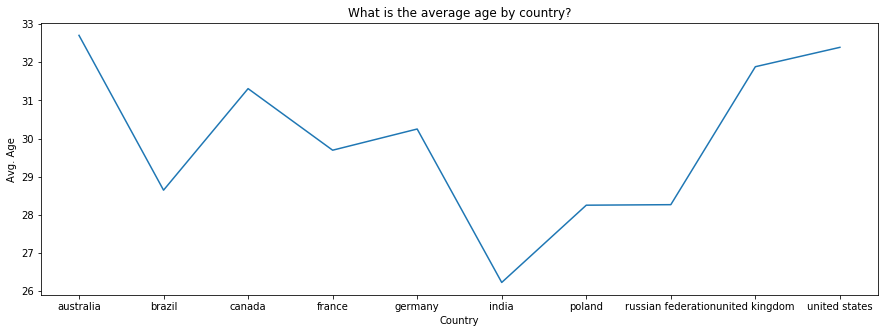

In [36]:
df_top_countries = df_working[df_working['country'].isin(top_countries)].copy()
df_top_countries = df_top_countries.dropna(subset=['age'])
df_top_countries.age = df_top_countries.age.astype(int)

agg_data = df_top_countries.groupby(['country']).age.mean()
x = agg_data.index.values.tolist()
y = agg_data.values.tolist()
plotter(x,y, "Country","Avg. Age", 'What is the average age by country?')

From the above plot, we can see that developing countries have lower age compared to developed countries such as Canda, USA and Australia. 

Missing data in the age feature are dropped 

### 3.2.2 What is the average IT Experince by country?

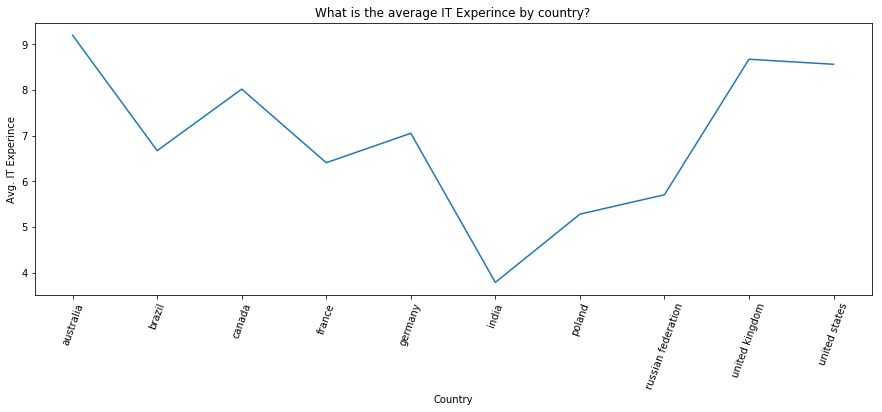

In [38]:
# pick the top 10 countries 
df_top_countries = df_working[df_working['country'].isin(top_countries)].copy()
df_top_countries = df_top_countries.dropna(subset=['ITExperince'])
df_top_countries.ITExperince = df_top_countries.ITExperince.astype(int)

agg_data = df_top_countries.groupby(['country']).ITExperince.mean()
x = agg_data.index.values.tolist()
y = agg_data.values.tolist()
plotter(x,y, "Country","Avg. IT Experince", 'What is the average IT Experince by country?', True)

In the above graph, we can see developed countries have higher avg. IT experince such as Australia and USA. While developing countries have lower avg IT experince such as India.

Missing data in the IT experince feature are dropped

### 3.2.2 What is the most popular development language? 

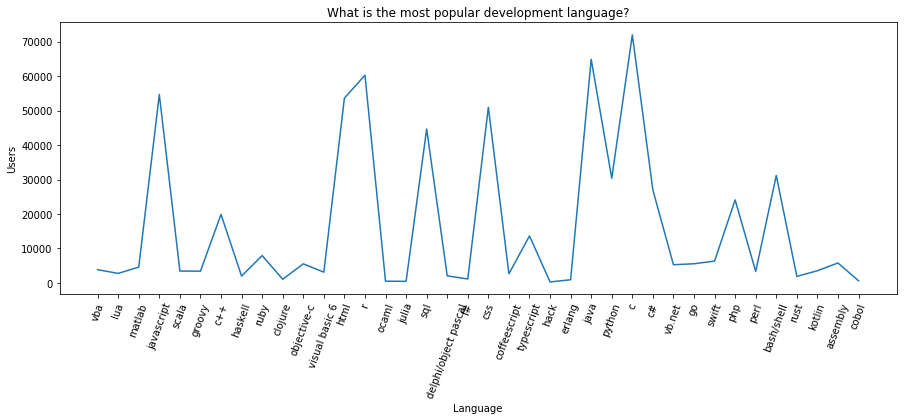

In [41]:
langs_count = [0]*len(list_of_langs)

i = 0
for lang in list_of_langs:
    x = df_list_for_langs[[lang in i for i  in  df_list_for_langs.languages]]
    langs_count[i] = len(x.index)
    i = i + 1

plotter(list_of_langs,langs_count, "Language","Users", 'What is the most popular development language?',True)

In the graph above, we can see that in 2018, C and java experinced developers are the highest. Also R with the rise of the data science field. Less developers using F#, Lua and VBA.

Missing data in the languages feature are dropped